    Feature_1  Feature_2  Feature_3
0    3.745401   3.048003   3.099445
1    5.986585   5.320623   5.691821
2    0.580836   1.005304   0.969921
3    7.080726   6.302011   6.491038
4    8.324426   7.385632   6.979591
..        ...        ...        ...
95   0.359423   1.218296   0.640890
96   2.865413   3.150743   2.875986
97   0.373482   0.727780   0.376520
98   1.270605   1.767355   1.990879
99   2.158210   2.481111   2.712779

[100 rows x 3 columns]


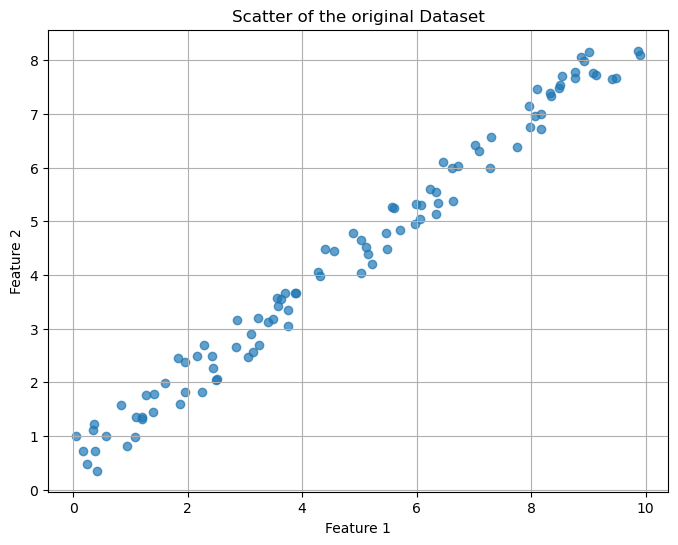

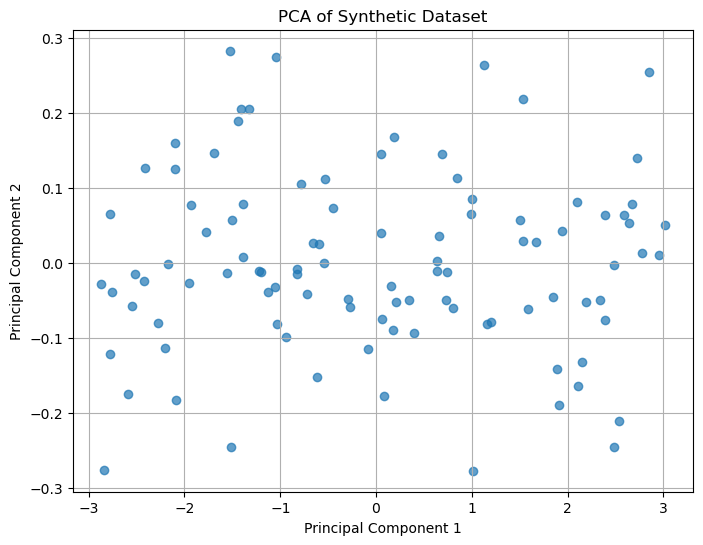

Explained Variance Ratio: [0.99299504 0.00473858 0.00226638]


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Create a synthetic dataset
np.random.seed(42)  # For reproducibility
n_samples = 100
n_features = 3

# Generate random data
data = np.random.rand(n_samples, n_features) * 10  # Scale data between 0 and 10
df = pd.DataFrame(data, columns=[f'Feature_{i+1}' for i in range(n_features)])
df['Feature_2'] = df['Feature_1'] * 0.8 + np.random.rand(n_samples)
df['Feature_3'] = df['Feature_1'] * 0.8 + np.random.rand(n_samples)


print(df)
# Step 4: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], alpha=0.7)
plt.title('Scatter of the original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()


# Step 2: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Step 3: Apply PCA
pca = PCA(n_components=3)  # Reduce to 2 dimensions
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Step 4: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7)
plt.title('PCA of Synthetic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Print explained variance
print('Explained Variance Ratio:', pca.explained_variance_ratio_)


In [37]:
pca.components_

array([[ 0.57805262,  0.57713652,  0.576861  ],
       [-0.09015377, -0.65744011,  0.74809411],
       [ 0.81100399, -0.48444395, -0.32800395]])

In [38]:
data_scaled @ pca.components_.T

array([[-8.29094745e-01, -7.78115904e-03,  1.46705358e-01],
       [ 8.40255948e-01,  1.12721152e-01, -5.84874913e-02],
       [-2.51321237e+00, -1.47958253e-02, -2.51263548e-02],
       [ 1.50695347e+00,  5.72084284e-02, -6.56874387e-02],
       [ 2.15211828e+00, -1.32580804e-01, -7.65166421e-03],
       [-1.55219062e+00, -1.32815187e-02, -1.66834782e-01],
       [-2.95870874e-01, -4.78716344e-02,  1.09626284e-02],
       [-2.20039356e+00, -1.13253504e-01,  9.37708361e-02],
       [ 4.78303561e-02,  3.95075508e-02, -1.19750828e-01],
       [ 6.42945304e-02, -7.48935844e-02,  1.07864058e-01],
       [ 7.25301703e-01, -4.96282733e-02,  4.39110453e-02],
       [ 2.84893721e+00,  2.54633389e-01,  4.33546238e-02],
       [-1.04565246e+00,  2.74190698e-01,  2.93646956e-02],
       [-8.89954790e-02, -1.15365516e-01, -1.08424364e-01],
       [-2.55062952e+00, -5.77506954e-02, -1.05919184e-01],
       [ 1.15291005e+00, -8.13707189e-02, -2.61448945e-02],
       [ 3.44793158e-01, -4.91231535e-02

In [39]:
pc_df

,PC1,PC2,PC3
0,-0.829095,-0.007781,0.146705
1,0.840256,0.112721,-0.058487
2,-2.513212,-0.014796,-0.025126
3,1.506953,0.057208,-0.065687
4,2.152118,-0.132581,-0.007652
...,...,...,...
95,-2.587026,-0.174772,-0.086252
96,-1.037927,-0.081383,-0.093989
97,-2.772611,-0.121120,0.058083
98,-1.928173,0.076612,-0.133034
